In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/voicegender/voice.csv


In [2]:
def precision_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TP[i]==0 or FP[i]==0):
            TP[i]=0.00000001
            FP[i]=0.00000001
        sonuc+=(TP[i]/(TP[i]+FP[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc

def recall_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TP[i]==0 or FN[i]==0):
            TP[i]=0.00000001
            FN[i]=0.00000001
        sonuc+=(TP[i]/(TP[i]+FN[i]))
       
    sonuc=sonuc/len(class_id)
    return sonuc
def accuracy_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        sonuc+=((TP[i]+TN[i])/(TP[i]+FP[i]+TN[i]+FN[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc
def specificity_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TN[i]==0 or FP[i]==0):
            TN[i]=0.00000001
            FP[i]=0.00000001
        sonuc+=(TN[i]/(FP[i]+TN[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc
def NPV_hesapla(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TN[i]==0 or FN[i]==0):
            TN[i]=0.00000001
            FN[i]=0.00000001
        sonuc+=(TN[i]/(TN[i]+FN[i]))
        
    sonuc=sonuc/len(class_id)
    return sonuc
def perf_measure(y_actual, y_pred):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return class_id,TP, FP, TN, FN

In [3]:
df=pd.read_csv("../input/voicegender/voice.csv")

In [4]:
df.label.value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [5]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
dict = {'label':{'male':1,'female':0}}      # label = column name
df.replace(dict,inplace = True)           # replace = str to numerical
x = df.loc[:, df.columns != 'label']
y = df.loc[:,'label'].values

In [7]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [8]:
x=(x - np.min(x))/(np.max(x)-np.min(x))


In [9]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
score_liste=[]
auc_scor=[]
precision_scor=[]
recall_scor=[]
f1_scor=[]
LR_plus=[]
LR_eksi=[]
odd_scor=[]
NPV_scor=[]
youden_scor=[]
specificity_scor=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

KNN Algoritması başarım sonucu:  0.9800210304942166


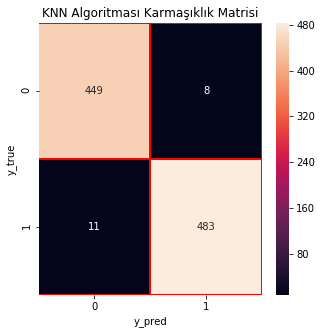

KNN algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       457
           1       0.98      0.98      0.98       494

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



In [10]:
k=4
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)
y_head=knn.predict(x_test)
print("KNN Algoritması başarım sonucu: ",knn.score(x_test,y_test))

from sklearn.metrics import confusion_matrix
cmknn = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmknn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("KNN Algoritması Karmaşıklık Matrisi")
plt.show()

classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
knn_fpr,knn_tpr,knn_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))

LR_plus.append((recall_hesapla(classid,tn,fp,fn,tp)/(1-specificity_hesapla(classid,tn,fp,fn,tp))))
LR_eksi.append(((1-recall_hesapla(classid,tn,fp,fn,tp))/specificity_hesapla(classid,tn,fp,fn,tp)))
odd_scor.append(((recall_hesapla(classid,tn,fp,fn,tp)/(1-specificity_hesapla(classid,tn,fp,fn,tp))))/(((1-recall_hesapla(classid,tn,fp,fn,tp))/specificity_hesapla(classid,tn,fp,fn,tp))))
youden_scor.append((recall_hesapla(classid,tn,fp,fn,tp)+specificity_hesapla(classid,tn,fp,fn,tp)-1))
print("KNN algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

Karar Ağaçları Algoritması için başarım sonucu:  0.9747634069400631
DTC algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       457
           1       0.98      0.97      0.98       494

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



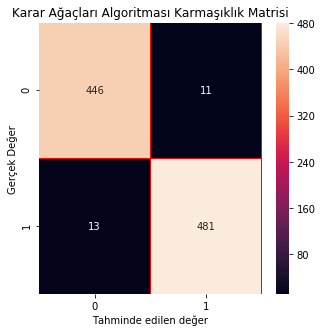

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_head=dtc.predict(x_test)
print("Karar Ağaçları Algoritması için başarım sonucu: ",dtc.score(x_test,y_test))

classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
dtc_fpr,dtc_tpr,dtc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)

print("DTC algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmdtc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmdtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahminde edilen değer")
plt.ylabel("Gerçek Değer")
plt.title("Karar Ağaçları Algoritması Karmaşıklık Matrisi")
plt.show()

Rastgele Orman Algoritması başarım sonucu:  0.9779179810725552
Rastgele Orman algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       457
           1       0.98      0.97      0.98       494

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



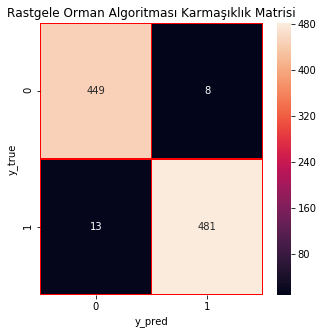

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=225,random_state=1)
rfc.fit(x_train,y_train)
y_head=rfc.predict(x_test)
print("Rastgele Orman Algoritması başarım sonucu: ",rfc.score(x_test,y_test))

classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
rfc_fpr,rfc_tpr,rfc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Rastgele Orman algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmrfc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmrfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Rastgele Orman Algoritması Karmaşıklık Matrisi")
plt.show()

Naive Bayes Algoritması başarım sonucu:  0.882229232386961
Naive Bayes algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       457
           1       0.89      0.88      0.89       494

    accuracy                           0.88       951
   macro avg       0.88      0.88      0.88       951
weighted avg       0.88      0.88      0.88       951



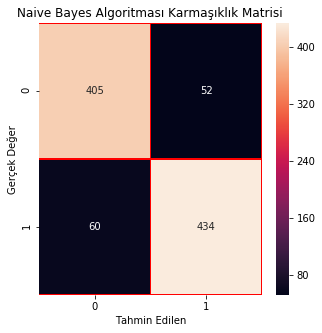

In [13]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_head=nb.predict(x_test)
print("Naive Bayes Algoritması başarım sonucu: ",nb.score(x_test,y_test))


classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
nb_fpr,nb_tpr,nb_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Naive Bayes algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmnb = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmnb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Naive Bayes Algoritması Karmaşıklık Matrisi")
plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regresyon Algoritması başarım sonucu:  0.9684542586750788
Lojistik Regresyon algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       457
           1       0.97      0.97      0.97       494

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



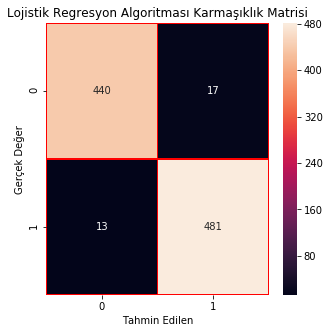

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_head=lr.predict(x_test)
print("Logistic Regresyon Algoritması başarım sonucu: ",lr.score(x_test,y_test))


classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
lrc_fpr,lrc_tpr,lrc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Lojistik Regresyon algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmlr = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmlr,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Lojistik Regresyon Algoritması Karmaşıklık Matrisi")
plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Destek Vektör Makineleri Algoritması başarım sonucu:  0.9663512092534174
Destek Vektör Makineleri algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       457
           1       0.96      0.97      0.97       494

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



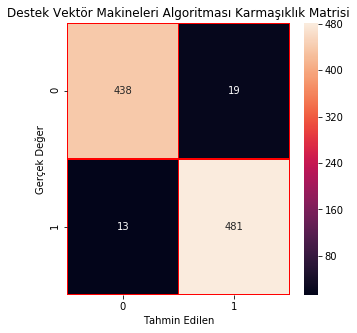

In [15]:
from sklearn.svm import SVC
svc=SVC(random_state=1)
svc.fit(x_train,y_train)
y_head=svc.predict(x_test)
print("Destek Vektör Makineleri Algoritması başarım sonucu: ",svc.score(x_test,y_test))


classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
svc_fpr,svc_tpr,svc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Destek Vektör Makineleri algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmsvc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmsvc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Destek Vektör Makineleri Algoritması Karmaşıklık Matrisi")
plt.show()

Gradient Boosting Classifier Algoritması başarım sonucu:  0.9768664563617245
Gradient Boosting Classifier algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       457
           1       0.98      0.97      0.98       494

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



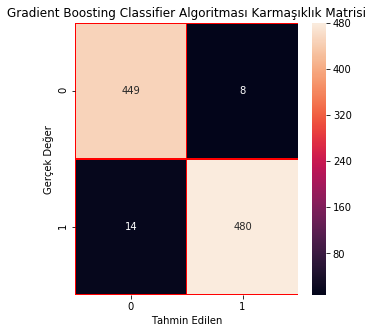

In [16]:
gfc=GradientBoostingClassifier(n_estimators= 1000, max_leaf_nodes= 4, max_depth=None,random_state= 2,min_samples_split= 5)
gfc.fit(x_train,y_train)
y_head=gfc.predict(x_test)
print("Gradient Boosting Classifier Algoritması başarım sonucu: ",gfc.score(x_test,y_test))

classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
gfc_fpr,gfc_tpr,gfc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Gradient Boosting Classifier algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmgfc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmgfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Gradient Boosting Classifier Algoritması Karmaşıklık Matrisi")
plt.show()

AdaBoosting Classifier Algoritması başarım sonucu:  0.9758149316508938
AdaBoosting Classifier algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       457
           1       0.98      0.98      0.98       494

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



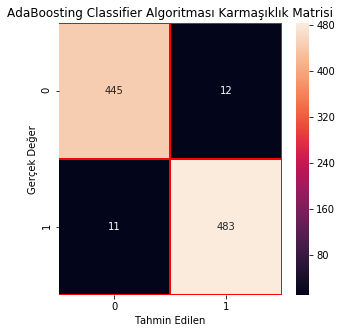

In [17]:
abc=AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(x_train,y_train)
y_head=abc.predict(x_test)
print("AdaBoosting Classifier Algoritması başarım sonucu: ",abc.score(x_test,y_test))


classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
abc_fpr,abc_tpr,abc_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("AdaBoosting Classifier algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmabc = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmabc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("AdaBoosting Classifier Algoritması Karmaşıklık Matrisi")
plt.show()

Yapay Sinir Ağları Algoritması başarım sonucu:  0.9663512092534174
Yapay Sinir Ağları algoritması için sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       457
           1       0.96      0.98      0.97       494

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



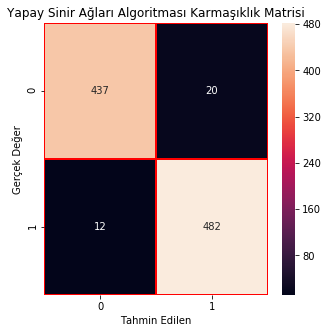

In [18]:
ysa=MLPClassifier(alpha=1, max_iter=1000)
ysa.fit(x_train,y_train)
y_head=ysa.predict(x_test)
print("Yapay Sinir Ağları Algoritması başarım sonucu: ",ysa.score(x_test,y_test))


classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
ysa_fpr,ysa_tpr,ysa_trr=roc_curve(y_test,y_head)
score_liste.append(accuracy_hesapla(classid,tn,fp,fn,tp))
precision_scor.append(precision_hesapla(classid,tn,fp,fn,tp))
recall_scor.append(recall_hesapla(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV_hesapla(classid,tn,fp,fn,tp))
specificity_scor.append(specificity_hesapla(classid,tn,fp,fn,tp))
TPR=recall_hesapla(classid,tn,fp,fn,tp)
TNR=specificity_hesapla(classid,tn,fp,fn,tp)
FPR=1-TNR
if FPR==0:
    FPR=0.00001
FNR=1-TPR
lreksi=FNR/TNR
lrarti=TPR/FPR
if lreksi==0:
    lreksi=0.00000001
LR_plus.append(TPR/FPR)
LR_eksi.append(FNR/TNR)
odd_scor.append(lrarti/lreksi)
youden_scor.append(TPR+TNR-1)
print("Yapay Sinir Ağları algoritması için sınıflandırma raporu: \n",classification_report(y_test,y_head))

cmysa = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmysa,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Yapay Sinir Ağları Algoritması Karmaşıklık Matrisi")
plt.show()

In [19]:
algo_liste=["KNN","Decision Tree","Random Forest","Naive Bayes","Linear Regression","Support Vector Machine","Gradient Boosting Classifier","AdaBoosting Classifier","Neural Network"]
score={"algo_list":algo_liste,"score_liste":score_liste,"precision":precision_scor,"recall":recall_scor,"f1_score":f1_scor,"AUC":auc_scor,"LR+":LR_plus,"LR-":LR_eksi,"ODD":odd_scor,"YOUDEN":youden_scor,"Specificity":specificity_scor}

In [20]:
df=pd.DataFrame(score)
df

,algo_list,score_liste,precision,recall,f1_score,AUC,LR+,LR-,ODD,YOUDEN,Specificity
0,KNN,0.980021,0.979897,0.980114,0.979995,0.980114,49.285778,0.020290,2429.087906,0.960227,0.980114
1,Decision Tree,0.974763,0.974660,0.974807,0.974729,0.974807,38.693714,0.025844,1497.203525,0.949614,0.974807
2,Random Forest,0.977918,0.977751,0.978089,0.977893,0.978089,44.639947,0.022401,1992.724907,0.956179,0.978089
3,Naive Bayes,0.882229,0.881986,0.882378,0.882120,0.882378,7.501845,0.133301,56.277683,0.764757,0.882378
4,Linear Regression,0.968454,0.968583,0.968243,0.968396,0.968243,30.488667,0.032799,929.558832,0.936485,0.968243
5,Support Vector Machine,0.966351,0.966588,0.966054,0.966282,0.966054,28.458863,0.035138,809.906909,0.932109,0.966054
6,Gradient Boosting Classifier,0.976866,0.976684,0.977077,0.976842,0.977077,42.624734,0.023461,1816.867974,0.954154,0.977077
7,AdaBoosting Classifier,0.975815,0.975817,0.975737,0.975776,0.975737,40.215518,0.024866,1617.287890,0.951475,0.975737
8,Neural Network,0.966351,0.966717,0.965972,0.966276,0.965972,28.387920,0.035226,805.873991,0.931945,0.965972


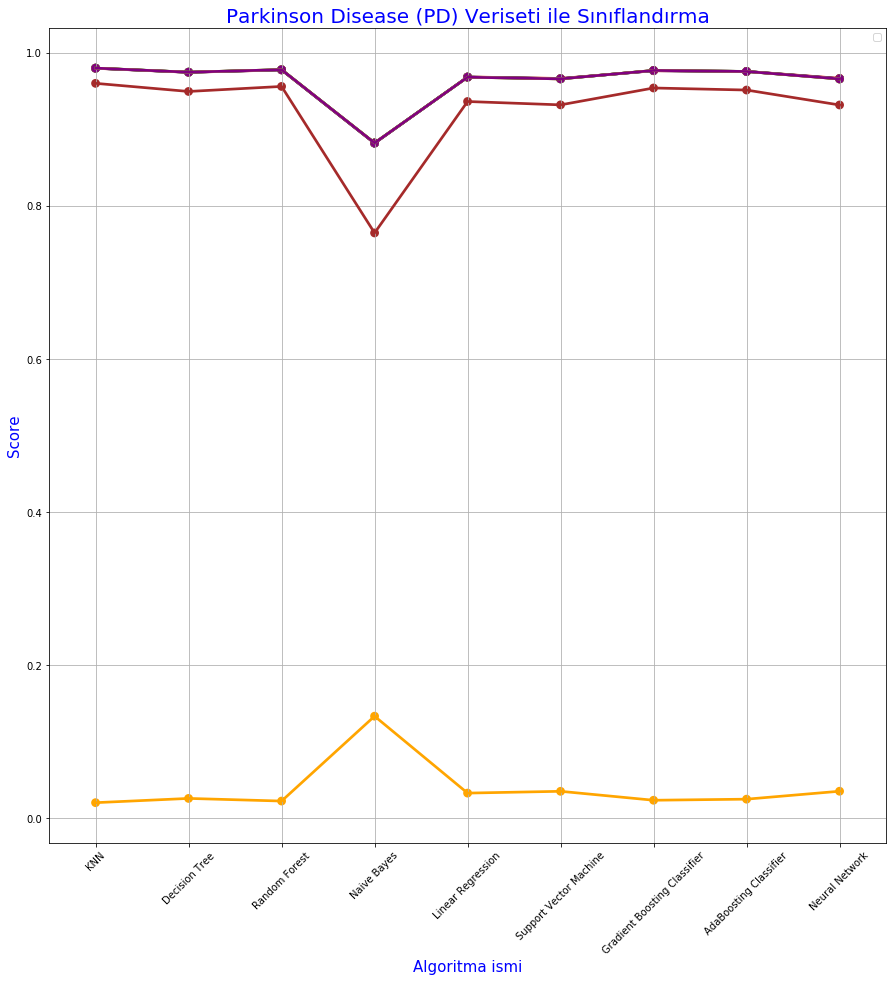

In [21]:
f,ax1 = plt.subplots(figsize =(15,15))
sns.pointplot(x=df['algo_list'], y=df['score_liste'],data=df,color='lime',alpha=0.8,label="score_liste")
sns.pointplot(x=df['algo_list'], y=df['precision'],data=df,color='red',alpha=0.8,label="precision")
sns.pointplot(x=df['algo_list'], y=df['recall'],data=df,color='black',alpha=0.8,label="recall")
sns.pointplot(x=df['algo_list'], y=df['f1_score'],data=df,color='blue',alpha=0.8,label="f1_score")
sns.pointplot(x=df['algo_list'], y=df['AUC'],data=df,color='yellow',alpha=0.8,label="AUC")

sns.pointplot(x=df['algo_list'], y=df['LR-'],data=df,color='orange',alpha=0.8,label="YOUDEN")

sns.pointplot(x=df['algo_list'], y=df['YOUDEN'],data=df,color='brown',alpha=0.8,label="LR-")
sns.pointplot(x=df['algo_list'], y=df['Specificity'],data=df,color='purple',alpha=0.8,label="Specificity")
plt.xlabel('Algoritma ismi',fontsize = 15,color='blue')
plt.ylabel('Score',fontsize = 15,color='blue')
plt.xticks(rotation= 45)
plt.title('Parkinson Disease (PD) Veriseti ile Sınıflandırma',fontsize = 20,color='blue')
plt.grid()
plt.legend()
plt.show()

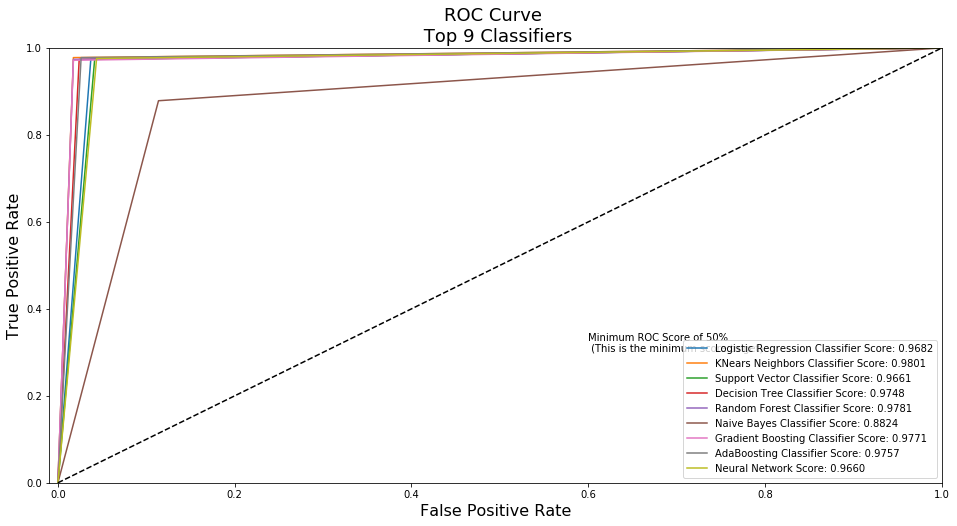

In [22]:
def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,rfc_fpr,rfc_tpr,nb_fpr,nb_tpr,gbc_fpr,gbc_tpr,abc_fpr,abc_tpr,ysa_fpr,ysa_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 9 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lr.predict(x_test))))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knn.predict(x_test))))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc.predict(x_test))))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, dtc.predict(x_test))))
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rfc.predict(x_test))))
    plt.plot(nb_fpr, nb_tpr, label='Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y_test, nb.predict(x_test))))
    plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier Score: {:.4f}'.format(roc_auc_score(y_test, gfc.predict(x_test))))
    plt.plot(abc_fpr, abc_tpr, label='AdaBoosting Classifier Score: {:.4f}'.format(roc_auc_score(y_test, abc.predict(x_test))))
    plt.plot(ysa_fpr, ysa_tpr, label='Neural Network Score: {:.4f}'.format(roc_auc_score(y_test, ysa.predict(x_test))))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                
                )
    plt.legend()
    
graph_roc_curve_multiple(lrc_fpr, lrc_tpr, knn_fpr, knn_tpr, svc_fpr, svc_tpr, dtc_fpr, dtc_tpr,rfc_fpr,rfc_tpr,nb_fpr,nb_tpr,gfc_fpr,gfc_tpr,abc_fpr,abc_tpr,ysa_fpr,ysa_tpr)
plt.show()